In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Fri Jul  8 06:49:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [4]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q "datasets==2.2.2" seqeval
!pip install gradio
!sudo apt install tesseract-ocr
!pip install pytesseract

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# !pip freeze

In [6]:
!rm -rf 'find -type d -name .ipynb_checkpoints'

In [7]:
!rmdir /content/dataset2/test/img_dir/.ipynb_checkpoints
!rmdir /content/dataset2/test/annotation_dir/.ipynb_checkpoints
!rmdir /content/dataset2/train/annotation_dir/.ipynb_checkpoints
!rmdir /content/dataset2/train/img_dir/.ipynb_checkpoints

rmdir: failed to remove '/content/dataset2/test/img_dir/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset2/test/annotation_dir/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset2/train/annotation_dir/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/dataset2/train/img_dir/.ipynb_checkpoints': No such file or directory


In [8]:
from datasets import load_dataset 
# from PIL import Image
# this dataset uses the new Image feature :)
dataset = load_dataset('/content/dataset2.py')

Reusing dataset sroie (/root/.cache/huggingface/datasets/sroie/discharge/1.0.0/f41a7ac33a7a08524590d2f8225a898b703973670ce3fa7adbe1166378ba2c85)


  0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
dataset["train"].features

{'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'id': Value(dtype='string', id=None),
 'image_path': Value(dtype='string', id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=23, names=['others', 'produttore_key', 'produttore_value', 'unitloc_key', 'unitloc_value', 'datarichiesta_key', 'datarichiesta_value', 'orariorichiesta_key', 'orariorichiesta_value', 'cer_key', 'cer_value', 'descrizione_key', 'descrizione_value', 'sf_key', 'sf_value', 'classpericolo_key', 'classpericolo_value', 'destino_key', 'destino_value', 'confezionamento_key', 'confezionamento_value', 'destinazione_key', 'destinazione_value'], id=None), length=-1, id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [10]:
example = dataset["train"][1]
example["image_path"]

'dataset2/train/img_dir/10.jpg'

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 36
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 5
    })
})

In [12]:
# example = dataset["train"][0]
# example["image"]

In [13]:
words, bboxes, ner_tags = example["words"], example["bboxes"], example["ner_tags"]
print(words)
print(bboxes)
print(ner_tags)

['nan', 'nan', 'nan', 'nan', 'a', 'nan', 'nan', 'nan', 'EUROCORPORATION', 'nan', 'nan', 'nan', 'CONSULEN', 'ZA', 'E', 'GE', 'nan', 'nan', 'nan', 'STIONE', 'RIFIUTI', 'nan', 'nan', 'nan', 'wy', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', 'nan', 'nan', 'nan', ' ', '

In [14]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

In [15]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image_path"
text_column_name = "words"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [16]:
print(label_list)

['others', 'produttore_key', 'produttore_value', 'unitloc_key', 'unitloc_value', 'datarichiesta_key', 'datarichiesta_value', 'orariorichiesta_key', 'orariorichiesta_value', 'cer_key', 'cer_value', 'descrizione_key', 'descrizione_value', 'sf_key', 'sf_value', 'classpericolo_key', 'classpericolo_value', 'destino_key', 'destino_value', 'confezionamento_key', 'confezionamento_value', 'destinazione_key', 'destinazione_value']


In [17]:
print(id2label)

{0: 'others', 1: 'produttore_key', 2: 'produttore_value', 3: 'unitloc_key', 4: 'unitloc_value', 5: 'datarichiesta_key', 6: 'datarichiesta_value', 7: 'orariorichiesta_key', 8: 'orariorichiesta_value', 9: 'cer_key', 10: 'cer_value', 11: 'descrizione_key', 12: 'descrizione_value', 13: 'sf_key', 14: 'sf_value', 15: 'classpericolo_key', 16: 'classpericolo_value', 17: 'destino_key', 18: 'destino_value', 19: 'confezionamento_key', 20: 'confezionamento_value', 21: 'destinazione_key', 22: 'destinazione_value'}


In [18]:
from PIL import Image

def prepare_examples(examples):
  images = [Image.open(path).convert("RGB") for path in examples['image_path']] #Image.open(examples[image_column_name])
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [19]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(ClassLabel(names=label_list)),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Loading cached processed dataset at /root/.cache/huggingface/datasets/sroie/discharge/1.0.0/f41a7ac33a7a08524590d2f8225a898b703973670ce3fa7adbe1166378ba2c85/cache-c4f8612b936adc1c.arrow


  0%|          | 0/1 [00:00<?, ?ba/s]

In [20]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 36
})

In [21]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> nan nan nan nan y nan nan nan EUROCORPORATION nan nan nan CONSULENZA EF GESTIONE RIFIUTL nan nan nan 4 nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan PRODUTTORE D&D Costruzioni SRL CLIENTE D&D Costruzioni SRL nan nan Unit. Loc. PORTA ROMANA - VIA METASTASIO 48 50124 (FI) | Operatore Mario Nobile - Mob. 3381558401 nan nan Referente FABRIZIO PIPOLO CF Produttore 6725110487 nan nan Telefono 3357566640 Email Cliente info@ddcostruzioni.net nan nan Data Richiesta 23-02-2022 Orario richiesta 08:00 Email Produttore | info@ddcostruzioni.net nan ZTL L] nan nan Mattina Dalle 08:00 Alle 12:00 PER LA LOGIST

In [22]:
train_dataset.set_format("torch")

In [23]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [24]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 5
})

In [25]:
eval_dataset.features['bbox']

Array2D(shape=(512, 4), dtype='int64', id=None)

In [26]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> nan nan nan nan  nan nan nan af nan nan nan EUROCORPORATION nan nan nan CONSULENZA E GESTIONE RIFLUTL nan nan nan ow nan nan nan  nan nan nan  nan nan nan  nan nan nan  nan nan nan PRODUTTORE COMUNE DI PISTOIA CLIENTE COMUNE DI PISTOIA nan nan Unit. Loc. Via Dino Buzzati, 1 51100 PISTOIA (PT) Operatore Francesca Buffolino - Mob. 327 6613420 nan Referente Francesco Andreotti CF Produttore 108690470 nan nan Telefono 366/3488969 Email Cliente f.andreotti@comune.pistoia.it nan nan Data Richiesta 25-02-2022 | Orario richiesta 08:00 Email Produttore | f.andreotti@comune.pistoia.it nan nan nan  nan nan nan  nan nan nan Mattina Dalle nan nan nan  nan nan nan ZTL nan nan nan  nan nan nan O nan nan nan  nan nan nan 08:00 Alle 13:00 PER LA LOGISTICA: nan nan nan  nan nan nan  nan nan nan Pomeriggio | Dalle nan nan nan 14:30 Alle 17:00 SCHEDA FATTA DA MATILDE nan nan nan  nan nan nan VEICOLO RICHIESTO ORARIO nan nan nan DAL LUNEDi AL VENERDi 08:00 13:00 MARTEDi E GIOVEDi 14:30 nan nan nan  na

In [27]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 nan 0
 nan 0
 nan 0
 nan 0
 y 0
 nan 0
 nan 0
 nan 0
 EUR 0
OC -100
OR -100
POR -100
ATION -100
 nan 0
 nan 0
 nan 0
 CONS 0
UL -100
EN -100
ZA -100
 EF 0
 G 0
EST -100
ION -100
E -100
 R 0
IF -100
I -100
UT -100
L -100
 nan 0
 nan 0
 nan 0
 4 0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 0
  0
 nan 0
 nan 0
 nan 

In [28]:
from datasets import load_metric

metric = load_metric("seqeval")

In [29]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

In [30]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="layoutlmv3-finetuned-discharge",
                                  max_steps=1000,
                                  per_device_train_batch_size=5,
                                  per_device_eval_batch_size=5,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  no_cuda=False)

In [32]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

max_steps is given, it will override any value given in num_train_epochs


In [33]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 36
  Num Epochs = 125
  Instantaneous batch size per device = 5
  Total train batch size (w. parallel, distributed & accumulation) = 5
  Gradient Accumulation steps = 1
  Total optimization steps = 1000
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,0.253607,0.500000,0.388889,0.437500,0.928881
200,No log,0.089033,0.876543,0.788889,0.830409,0.983521
300,No log,0.053652,0.886364,0.866667,0.876404,0.991327
400,No log,0.031060,0.988889,0.988889,0.988889,0.999133
500,0.190400,0.021158,1.000000,1.000000,1.000000,1.000000
600,0.190400,0.015809,1.000000,1.000000,1.000000,1.000000
700,0.190400,0.012746,1.000000,1.000000,1.000000,1.000000
800,0.190400,0.011063,1.000000,1.000000,1.000000,1.000000
900,0.190400,0.010207,1.000000,1.000000,1.000000,1.000000
1000,0.014400,0.009929,1.000000,1.000000,1.000000,1.000000


***** Running Evaluation *****
  Num examples = 5
  Batch size = 5
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: unitloc_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: unitloc_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE

TrainOutput(global_step=1000, training_loss=0.10236725854873657, metrics={'train_runtime': 993.6564, 'train_samples_per_second': 5.032, 'train_steps_per_second': 1.006, 'total_flos': 1194558478848000.0, 'train_loss': 0.10236725854873657, 'epoch': 125.0})

In [34]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 5
  Batch size = 5
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: others seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: produttore_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: unitloc_key seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: unitloc_value seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeva

{'epoch': 125.0,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_loss': 0.021158166229724884,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 0.5794,
 'eval_samples_per_second': 8.63,
 'eval_steps_per_second': 1.726}

In [35]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("/content/layoutlmv3-finetuned-discharge/checkpoint-1000")#/content/layoutlmv3-finetuned-invoice/checkpoint-2000

loading configuration file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/config.json
Model config LayoutLMv3Config {
  "_name_or_path": "/content/layoutlmv3-finetuned-discharge/checkpoint-1000",
  "architectures": [
    "LayoutLMv3ForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "produttore_key",
    "2": "produttore_value",
    "3": "unitloc_key",
    "4": "unitloc_value",
    "5": "datarichiesta_key",
    "6": "datarichiesta_value",
    "7": "orariorichiesta_key",
    "8": "orariorichiesta_value",
    "9": "cer_key",
    "10": "cer_value",
    "11": "descrizione_key",
    "12": "descrizione_value",
    "13": "sf_key",
    "14": "sf_value",
    "15": "classpericolo_k

In [36]:
example = dataset["test"][0]
print(example.keys())

image = Image.open(example["image_path"])
words = example["words"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt", truncation=True)
for k,v in encoding.items():
  print(k,v.shape)

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])
input_ids torch.Size([1, 512])
attention_mask torch.Size([1, 512])
bbox torch.Size([1, 512, 4])
labels torch.Size([1, 512])
pixel_values torch.Size([1, 3, 224, 224])


In [37]:
words

['nan',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 'af',
 'nan',
 'nan',
 'nan',
 'EUROCORPORATION',
 'nan',
 'nan',
 'nan',
 'CONSULENZA',
 'E',
 'GESTIONE',
 'RIFLUTL',
 'nan',
 'nan',
 'nan',
 'ow',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 ' ',
 'nan',
 'nan',
 'nan',
 'PRODUTTORE',
 'COMUNE',
 'DI',
 'PISTOIA',
 'CLIENTE',
 'COMUNE',
 'DI',
 'PISTOIA',
 'nan',
 'nan',
 'Unit.',
 'Loc.',
 'Via',
 'Dino',
 'Buzzati,',
 '1',
 '51100',
 'PISTOIA',
 '(PT)',
 'Operatore',
 'Francesca',
 'Buffolino',
 '-',
 'Mob.',
 '327',
 '6613420',
 'nan',
 'Referente',
 'Francesco',
 'Andreotti',
 'CF',
 'Produttore',
 '108690470',
 'nan',
 'nan',
 'Telefono',
 '366/3488969',
 'Email',
 'Cliente',
 'f.andreotti@comune.pistoia.it',
 'nan',
 'nan',
 'Data',
 'Richiesta',
 '25-02-2022',
 '|',
 'Orario',
 'richiesta',
 '08:00',
 'Email',
 'Produttore',
 '|',
 'f.andreotti@comune.pistoia.it',
 'nan',
 'nan',
 'nan',
 ' ',

In [38]:
with torch.no_grad():
  outputs = model(**encoding)

logits = outputs.logits
print(logits.shape)

predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:703: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


torch.Size([1, 512, 23])
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 6, 6, 6, 6, 6, 6, 0, 7, 7, 7, 7, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100, -100, -100, 0, 0, 0, 0, -100, -100, -100, 0, 0, -100, -100, -100, 0, -100, -100, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -100, -100, -100, -100, 2, -100, 2, 2, -100, -100, -100, 0, -100, 0, -100, 0, 0, -100, -100, -100, 0, 0, 3, -100, 3, -100, 4, 4, 4, -100, -100, 4, 4, -100, 4, -100, -100, -100, 4, -100, -100, 0, -100, -100, 0, -100, 0, -100, -100, 0, 0, -100, 0, 0, -100, -100, 0, 0, -100, -100, 0, -100, 0, -100, 0, 0, -100, -100, -100, 0, -100, -100, -100, 0, 0, 0, -100, -100, 0, -100, -100, -100, -100, 0, 0, -100, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 0, 0, 5, 5, -100, 6, -100, -100, -100, -100, -100, 0, 7, -100, 7, -100, 8, -100, -100, 0, 0, -100, -100, -100, 0, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

In [41]:
true_labels

['others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'produttore_key',
 'produttore_value',
 'produttore_value',
 'produttore_value',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'unitloc_key',
 'unitloc_key',
 'unitloc_value',
 'unitloc_value',
 'unitloc_value',
 'unitloc_value',
 'unitloc_value',
 'unitloc_value',
 'unitloc_value',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 

## prediction Value

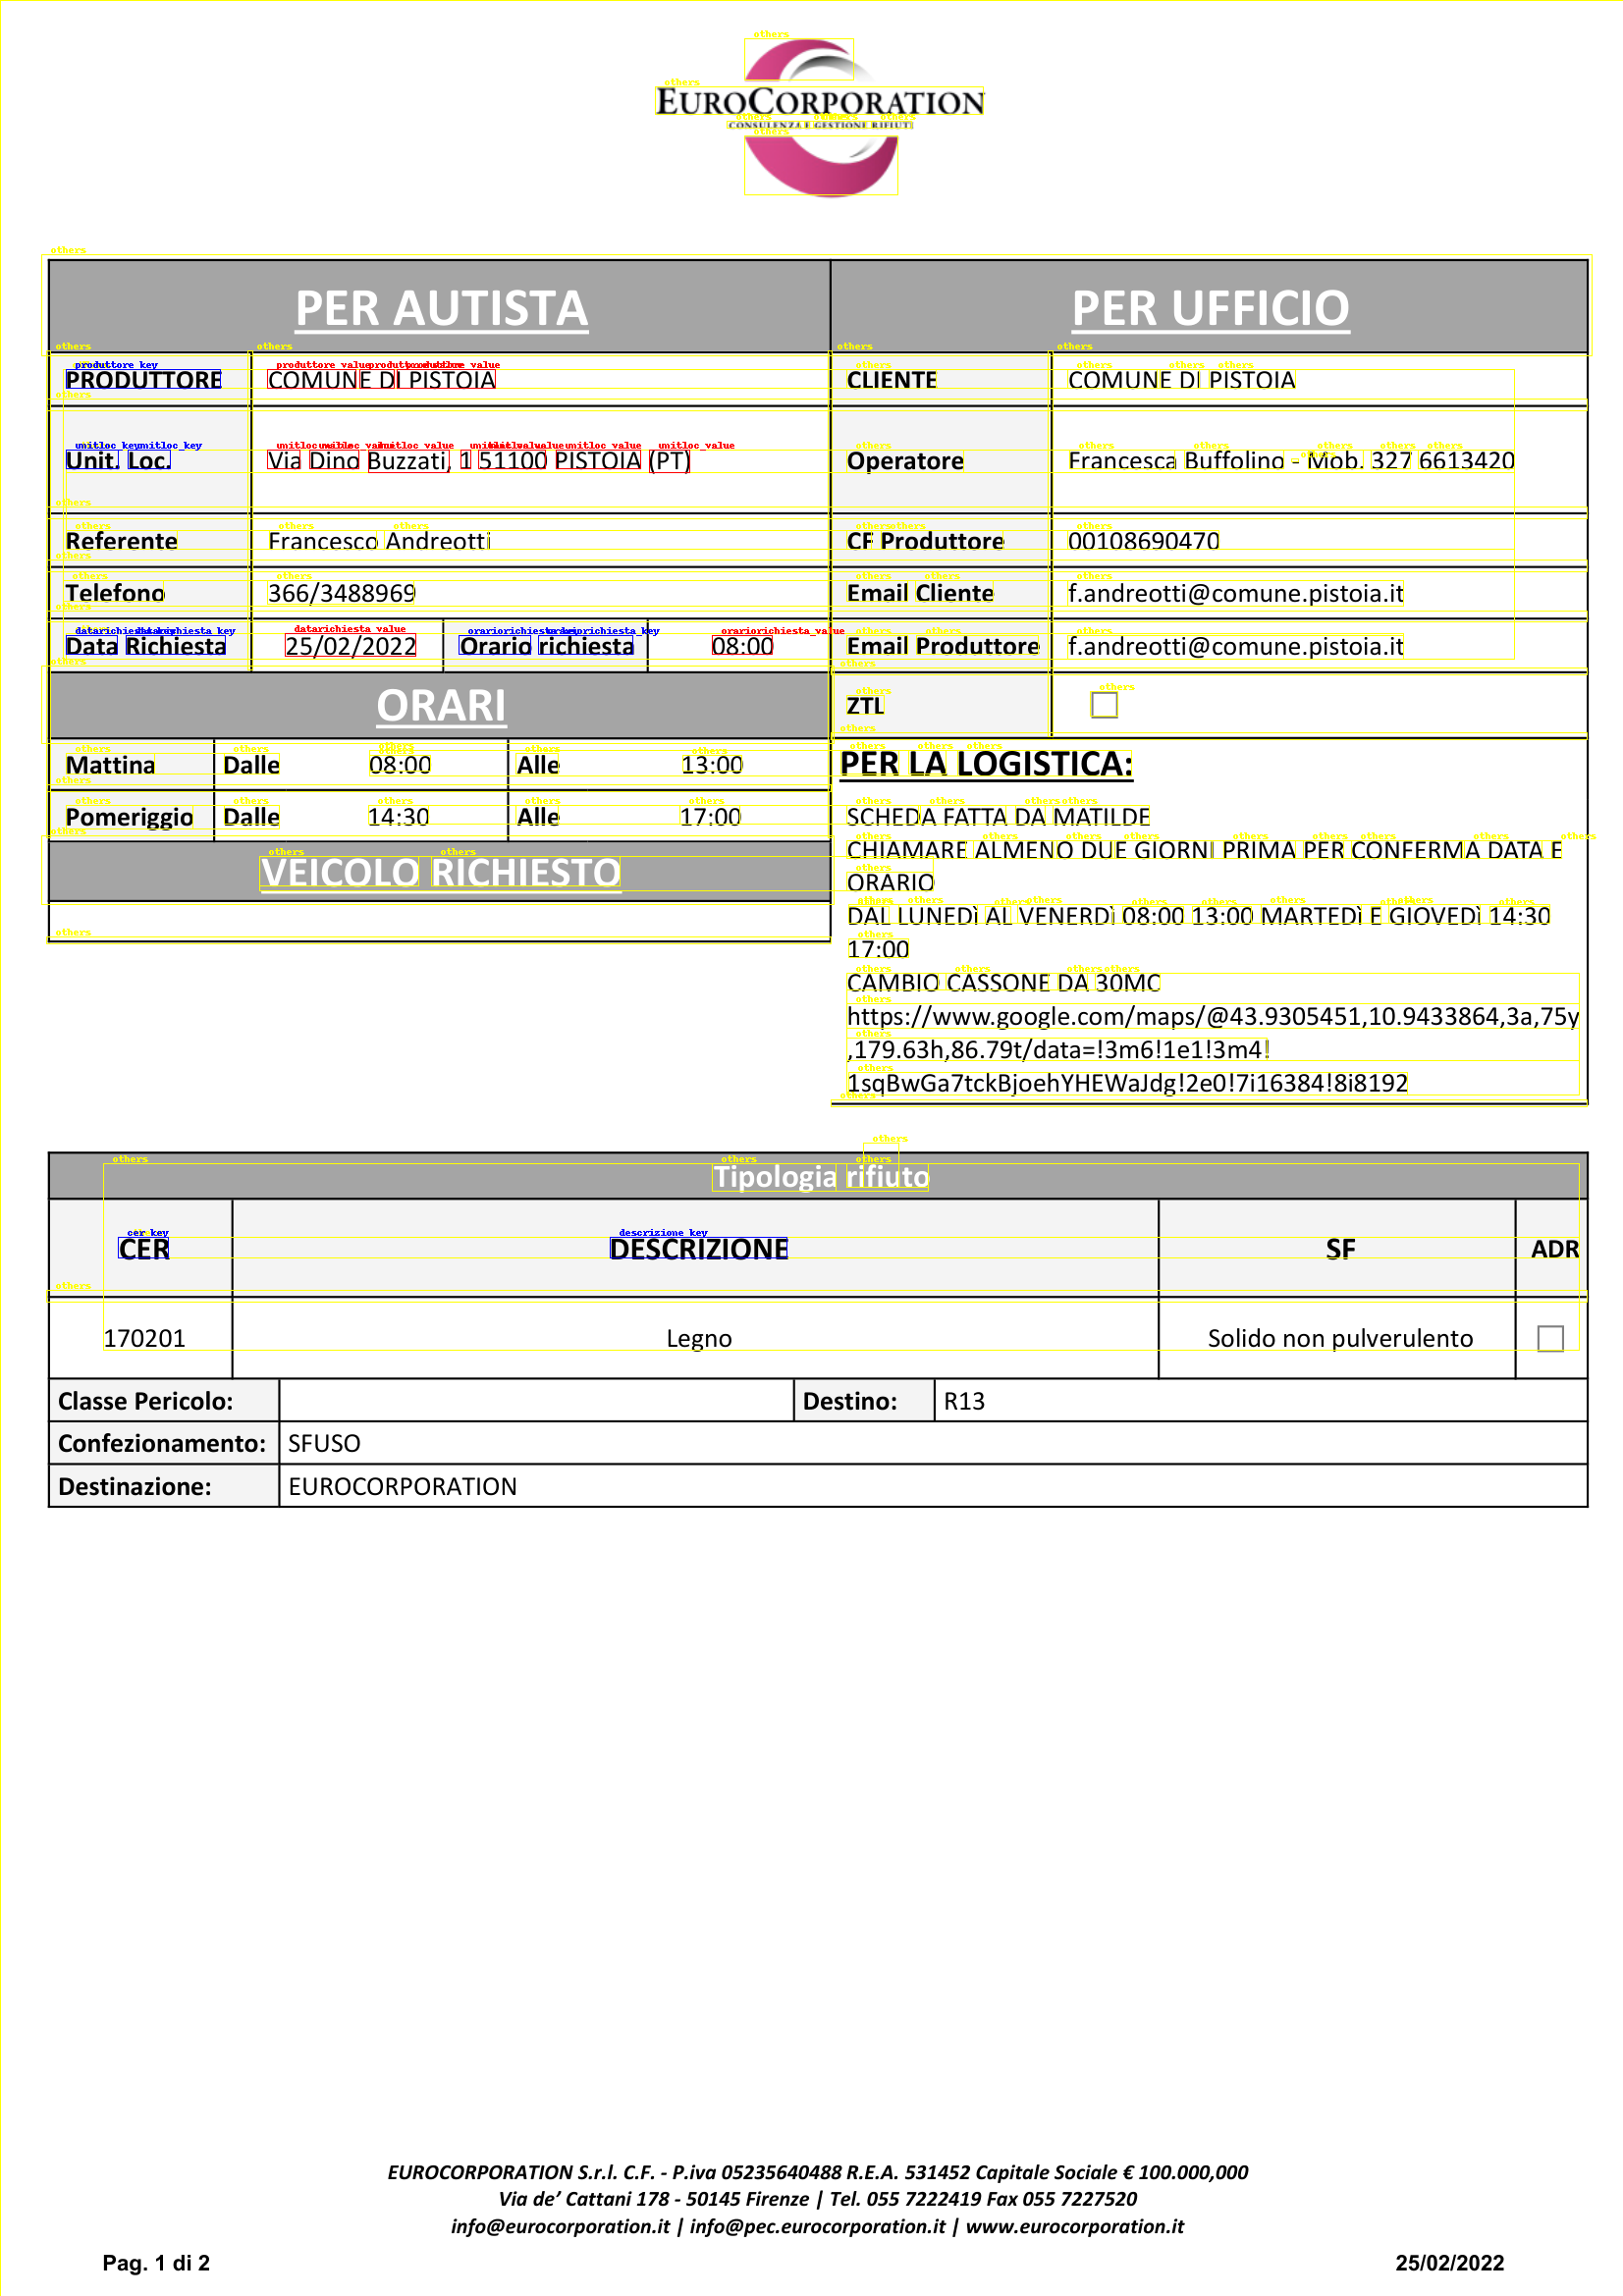

In [42]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    #label = label[2:]
    if not label:
      return 'other'
    return label


label2color = {
    "others": 'yellow',
    "produttore_key": 'blue',
    "produttore_value": 'red',
    "unitloc_key": 'blue',
    "unitloc_value": 'red',
    "datarichiesta_key": 'blue',
    "datarichiesta_value": 'red',
    "orariorichiesta_key": 'blue',
    "orariorichiesta_value":'red',
    "cer_key": 'blue',
    "cer_value": 'red',
    "descrizione_key": 'blue',
    "descrizione_value": 'red',
    "sf_key": 'blue',
    "sf_value": 'red',
    "classpericolo_key": 'blue',
    "destino_key": 'blue',
     "destino_value": 'red',
    "confezionamento_key": 'blue',
    "confezionamento_value": 'red',
    "destinazione_key": 'blue',
    "destinazione_value": 'red'
  }





# label2color = {
#     "others": 'yellow',
#     "key": 'blue',
#     "value": 'red',
#   }

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)
    # print(predicted_label)
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

In [43]:
# pr=[]
# for i,j in zip(predictions, words):
#   if id2label[i] =="produttore_key":
#     pr.append(j)
#   # print(i, j, ": " ,id2label[i])

# " ".join(pr)

## Ground Truth Value

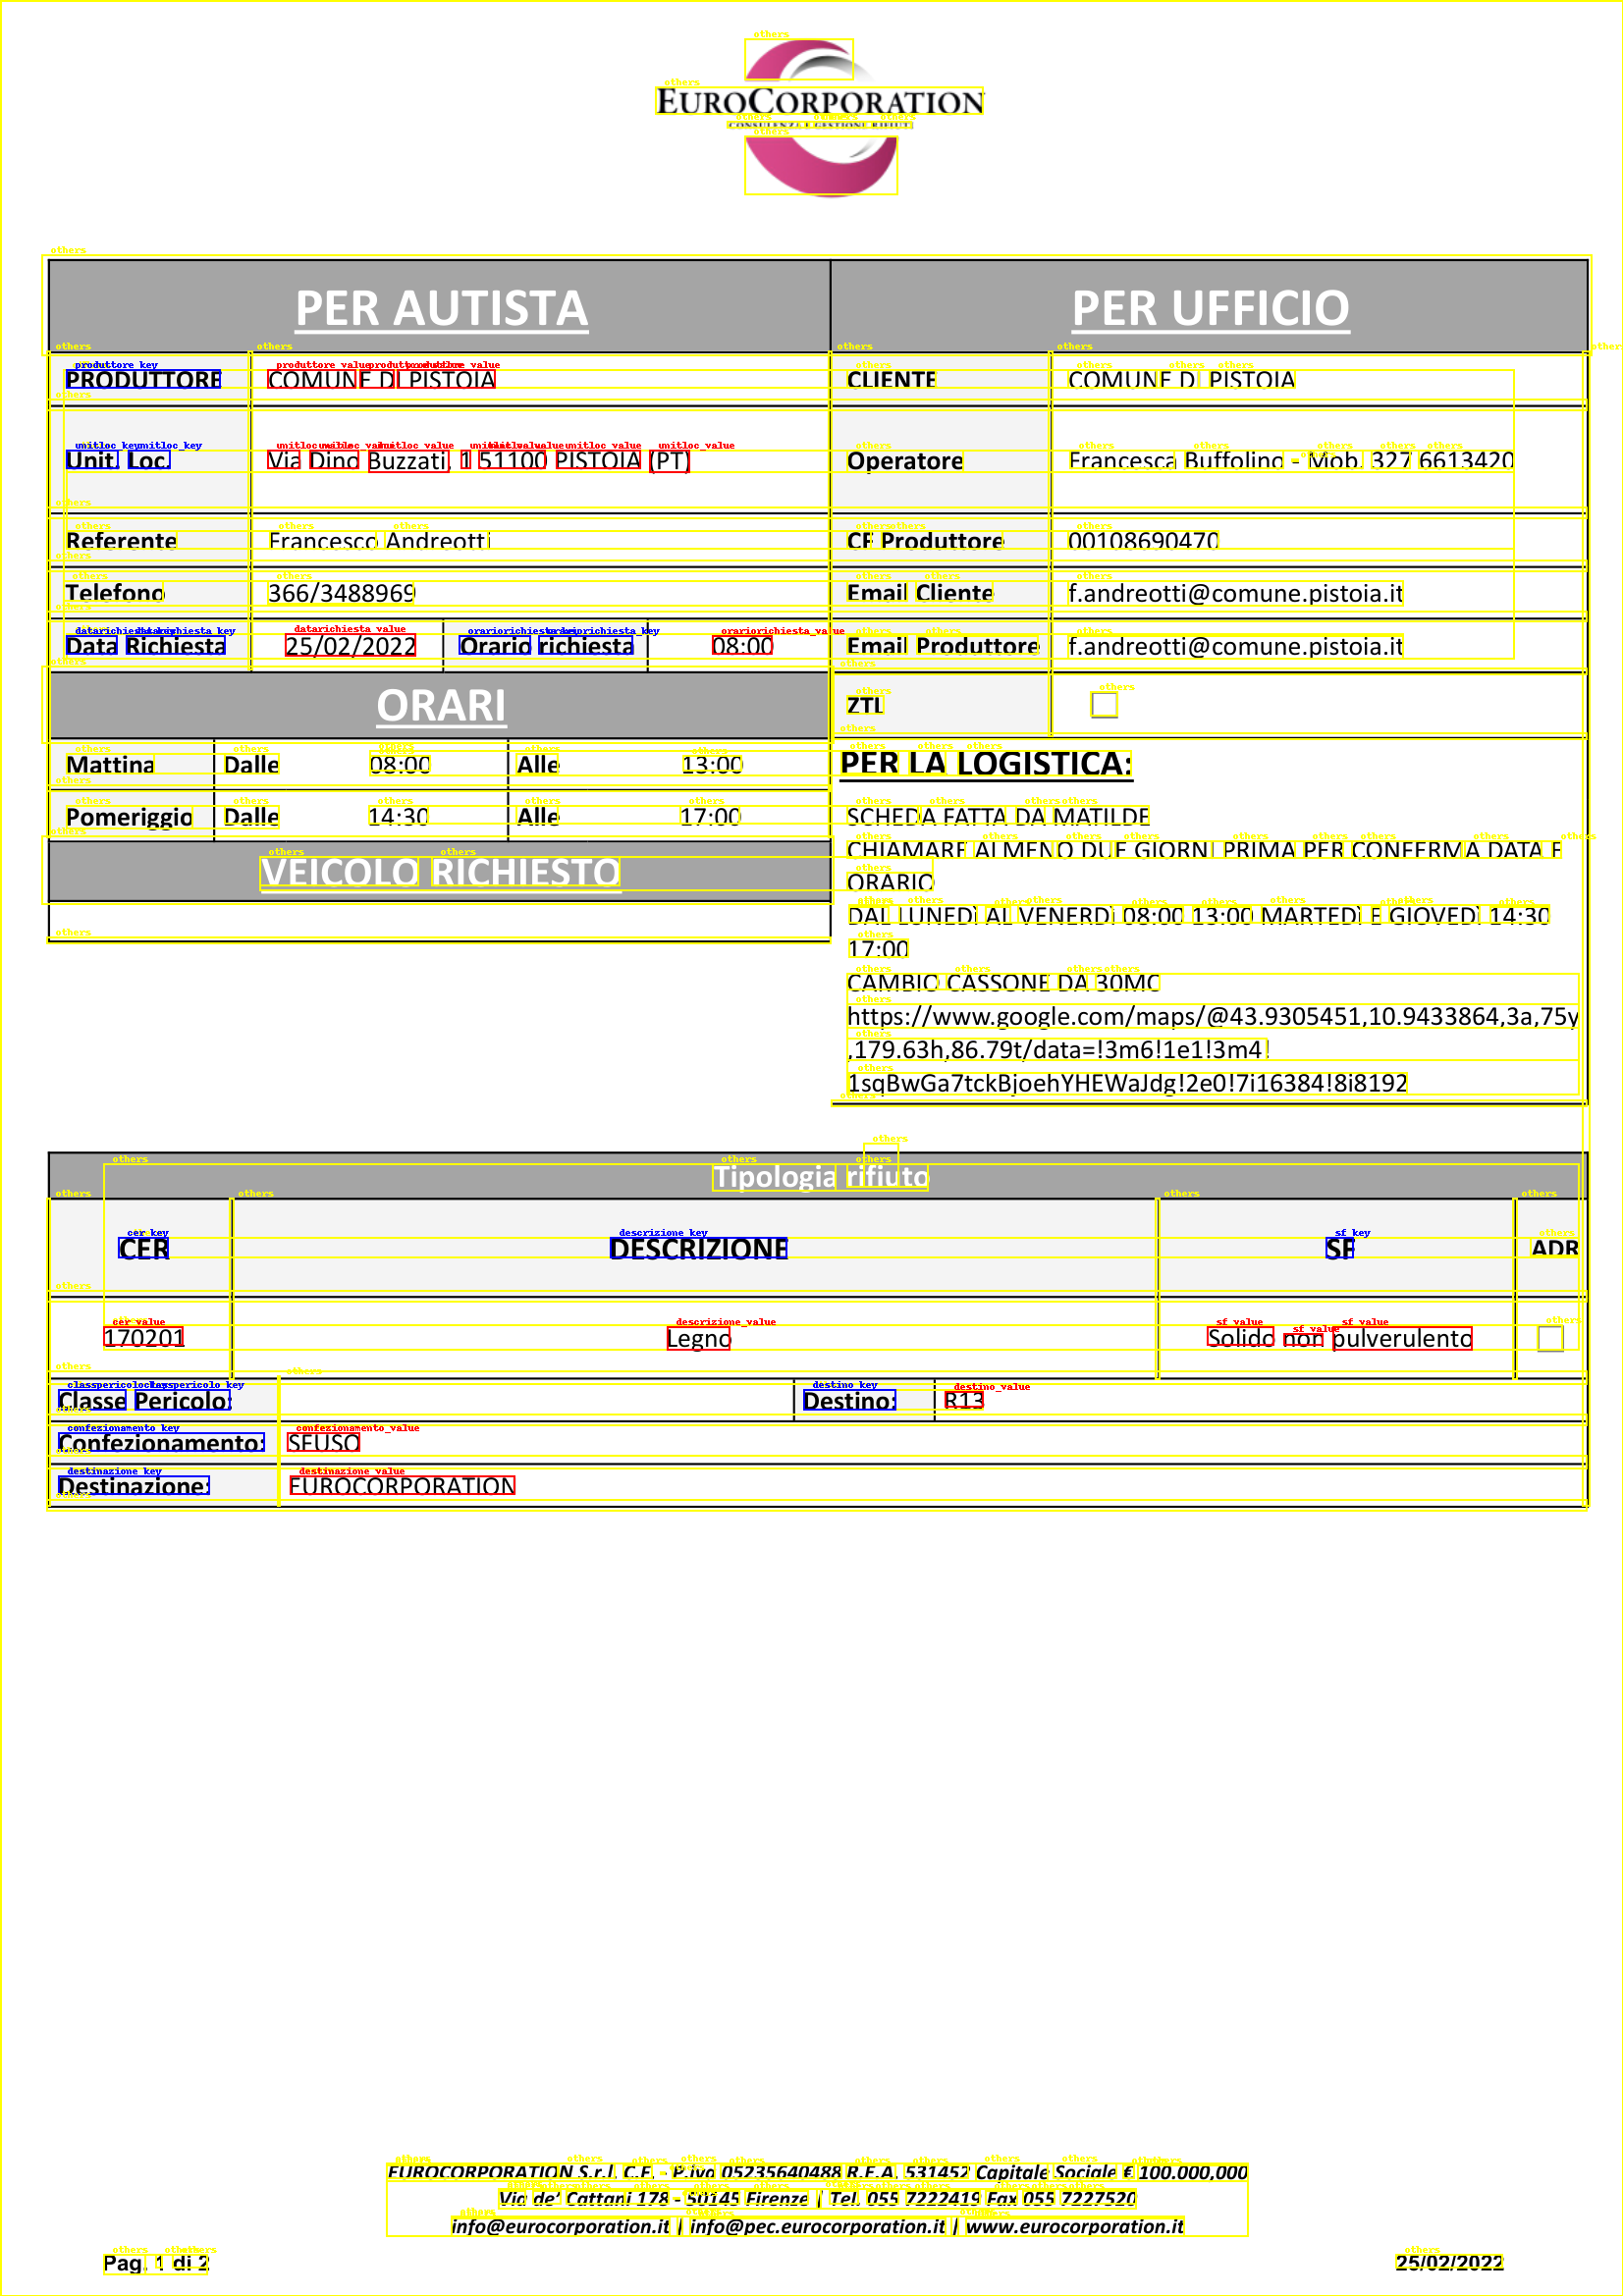

In [44]:
image = Image.open(example["image_path"]).convert("RGB")

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label])
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image

### Inference

In [45]:
# !tesseract — version

In [46]:
import os

# import gradio as gr
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import PIL
from itertools import groupby
from transformers import AutoModelForTokenClassification
from datasets.features import ClassLabel
from transformers import AutoProcessor
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
import torch
from datasets import load_metric
from PIL import Image, ImageDraw, ImageFont
from transformers import LayoutLMv3ForTokenClassification,LayoutLMv3FeatureExtractor
from transformers.data.data_collator import default_data_collator


from transformers import AutoModelForTokenClassification
from datasets import load_dataset
from PIL import Image, ImageDraw, ImageFont


# define id2label
id2label = model.config.id2label
print('id2label',id2label)


label_ints = np.random.randint(0,len(PIL.ImageColor.colormap.items()),42)
print('id2label.items()',id2label.items())
label_color_pil = [k for k,_ in PIL.ImageColor.colormap.items()]
label_color = [label_color_pil[i] for i in label_ints]
label2color = {}
for k,v in id2label.items():
  if v[:2] == '':
    label2color['o']=label_color[k]
  else:
    label2color[v[2:]]=label_color[k]

processor = AutoProcessor.from_pretrained("/content/layoutlmv3-finetuned-discharge/checkpoint-1000", apply_ocr=True)
model = AutoModelForTokenClassification.from_pretrained("/content/layoutlmv3-finetuned-discharge/checkpoint-1000")


def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]


def iob_to_label(label):
    return label



def process_image(image):

    print(type(image))
    width, height = image.size


    feature_extractor = LayoutLMv3FeatureExtractor(apply_ocr=True)
    encoding_feature_extractor = feature_extractor(image, return_tensors="pt")
    words, boxes = encoding_feature_extractor.words, encoding_feature_extractor.boxes

    custom_config = r'--oem 3 --psm 6'
    # encode
    encoding = processor(image, truncation=True, return_offsets_mapping=True, return_tensors="pt")
    offset_mapping = encoding.pop('offset_mapping')

    # forward pass
    outputs = model(**encoding)

    # get predictions
    predictions = outputs.logits.argmax(-1).squeeze().tolist()
    token_boxes = encoding.bbox.squeeze().tolist()



    # only keep non-subword predictions
    is_subword = np.array(offset_mapping.squeeze().tolist())[:,0] != 0
    true_predictions = [id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
    true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]

    true_boxes = true_boxes[1:-1]
    true_predictions = true_predictions[1:-1]

    preds = []
    l_words = []
    bboxes = []

    for i,j in enumerate(true_predictions):

      if j != 'O':
        preds.append(true_predictions[i])
        l_words.append(words[0][i])
        bboxes.append(true_boxes[i])

    return bboxes, preds, l_words, image



def visualize_image(final_bbox, final_preds, l_words, image):

      draw = ImageDraw.Draw(image)
      font = ImageFont.load_default()


      label2color = {
          "others": 'yellow',
          "produttore_key": 'blue',
          "produttore_value": 'red',
          "unitloc_key": 'blue',
          "unitloc_value": 'red',
          "datarichiesta_key": 'blue',
          "datarichiesta_value": 'red',
          "orariorichiesta_key": 'blue',
          "orariorichiesta_value":'red',
          "cer_key": 'blue',
          "cer_value": 'red',
          "descrizione_key": 'blue',
          "descrizione_value": 'red',
          "sf_key": 'blue',
          "sf_value": 'red',
          "classpericolo_key": 'blue',
          "destino_key": 'blue',
          "destino_value": 'red',
          "confezionamento_key": 'blue',
          "confezionamento_value": 'red',
          "destinazione_key": 'blue',
          "destinazione_value": 'red'
        }

      
      l2l = {
          "others": 'yellow',
          "produttore_key": 'blue',
          "produttore_value": 'red',
          "unitloc_key": 'blue',
          "unitloc_value": 'red',
          "datarichiesta_key": 'blue',
          "datarichiesta_value": 'red',
          "orariorichiesta_key": 'blue',
          "orariorichiesta_value":'red',
          "cer_key": 'blue',
          "cer_value": 'red',
          "descrizione_key": 'blue',
          "descrizione_value": 'red',
          "sf_key": 'blue',
          "sf_value": 'red',
          "classpericolo_key": 'blue',
          "destino_key": 'blue',
          "destino_value": 'red',
          "confezionamento_key": 'blue',
          "confezionamento_value": 'red',
          "destinazione_key": 'blue',
          "destinazione_value": 'red'
        }

      f_labels = {
          "others": 'yellow',
          "produttore_key": 'blue',
          "produttore_value": 'red',
          "unitloc_key": 'blue',
          "unitloc_value": 'red',
          "datarichiesta_key": 'blue',
          "datarichiesta_value": 'red',
          "orariorichiesta_key": 'blue',
          "orariorichiesta_value":'red',
          "cer_key": 'blue',
          "cer_value": 'red',
          "descrizione_key": 'blue',
          "descrizione_value": 'red',
          "sf_key": 'blue',
          "sf_value": 'red',
          "classpericolo_key": 'blue',
          "destino_key": 'blue',
          "destino_value": 'red',
          "confezionamento_key": 'blue',
          "confezionamento_value": 'red',
          "destinazione_key": 'blue',
          "destinazione_value": 'red'
        }

      json_df = []

      for ix, (prediction, box) in enumerate(zip(final_preds, final_bbox)):
        predicted_label = iob_to_label(prediction).lower()
        draw.rectangle(box, outline=label2color[predicted_label])
        draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)

        json_dict = {}
        json_dict['TEXT'] = l_words[ix]
        json_dict['LABEL'] = f_labels[predicted_label]
        
        json_df.append(json_dict)
      print('json_df',json_df)
      return image, json_df



# for prediction, box in zip(true_predictions, true_boxes):
#     predicted_label = iob_to_label(prediction)
#     print(predicted_label)
#     draw.rectangle(box, outline=label2color[predicted_label])
#     draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

# image
def process_form(json_df):

  labels = [x['LABEL'] for x in json_df]
  texts = [x['TEXT'] for x in json_df]
  cmb_list = []
  for i, j in enumerate(labels):
    cmb_list.append([labels[i], texts[i]])

  grouper = lambda l: [[k] + sum((v[1::] for v in vs), []) for k, vs in groupby(l, lambda x: x[0])]

  list_final = grouper(cmb_list)
  lst_final = []
  for x in list_final:
    json_dict = {}
    json_dict[x[0]] = (' ').join(x[1:])
    lst_final.append(json_dict)

  return lst_final

from PIL import Image, ImageDraw, ImageFont
image = Image.open('/content/7.jpg')
image = image.convert("RGB")

# gets the bounding boxes, predictions, extracted words and image processed
bbox, preds, words, image = process_image(image)

# returns image and extracted key-value pairs along with title as the output
im, df = visualize_image(bbox, preds, words, image)

# process and returns k-v pairs by concatenating relevant strings.
df_main = process_form(df)

image

loading feature extractor configuration file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/preprocessor_config.json
loading feature extractor configuration file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/preprocessor_config.json
Feature extractor LayoutLMv3FeatureExtractor {
  "apply_ocr": true,
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "LayoutLMv3FeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "ocr_lang": null,
  "processor_class": "LayoutLMv3Processor",
  "resample": 2,
  "size": 224
}

Didn't find file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/added_tokens.json. We won't load it.
loading file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/vocab.json
loading file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/merges.txt
loading file /content/layoutlmv3-finetuned-discharge/checkpoint-1000/tokenizer.json
loading file None
loading fi

id2label {0: 'others', 1: 'produttore_key', 2: 'produttore_value', 3: 'unitloc_key', 4: 'unitloc_value', 5: 'datarichiesta_key', 6: 'datarichiesta_value', 7: 'orariorichiesta_key', 8: 'orariorichiesta_value', 9: 'cer_key', 10: 'cer_value', 11: 'descrizione_key', 12: 'descrizione_value', 13: 'sf_key', 14: 'sf_value', 15: 'classpericolo_key', 16: 'classpericolo_value', 17: 'destino_key', 18: 'destino_value', 19: 'confezionamento_key', 20: 'confezionamento_value', 21: 'destinazione_key', 22: 'destinazione_value'}
id2label.items() dict_items([(0, 'others'), (1, 'produttore_key'), (2, 'produttore_value'), (3, 'unitloc_key'), (4, 'unitloc_value'), (5, 'datarichiesta_key'), (6, 'datarichiesta_value'), (7, 'orariorichiesta_key'), (8, 'orariorichiesta_value'), (9, 'cer_key'), (10, 'cer_value'), (11, 'descrizione_key'), (12, 'descrizione_value'), (13, 'sf_key'), (14, 'sf_value'), (15, 'classpericolo_key'), (16, 'classpericolo_value'), (17, 'destino_key'), (18, 'destino_value'), (19, 'confezionam

All model checkpoint weights were used when initializing LayoutLMv3ForTokenClassification.

All the weights of LayoutLMv3ForTokenClassification were initialized from the model checkpoint at /content/layoutlmv3-finetuned-discharge/checkpoint-1000.
If your task is similar to the task the model of the checkpoint was trained on, you can already use LayoutLMv3ForTokenClassification for predictions without further training.


FileNotFoundError: ignored

In [ ]:
# pr=[]
# for i,j in zip(predictions, words):
#   if id2label[i] =="produttore_key":
#     pr.append(j)
#   # print(i, j, ": " ,id2label[i])

# " ".join(pr)

In [ ]:
# df_main

In [ ]:
import pandas as pd
len_data = len(df_main)
key_list =[]
value_list = []
for i in df_main:
    for k, v in i.items():
        if k == 'blue':
            key_list.append(v)
        if k == 'red':
            value_list.append(v)
print(len(key_list), key_list)
print(len(value_list), value_list)

df = pd.DataFrame({'blue': key_list[:6], 'red':value_list[:6]})
df

In [ ]:
# image = Image.open(example["image_path"]).convert("RGB")

# draw = ImageDraw.Draw(image)

# for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
#   actual_label = iob_to_label(id2label[label])
#   box = unnormalize_box(box, width, height)
#   draw.rectangle(box, outline=label2color[actual_label], width=2)
#   draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

# image

In [ ]:
# import os

# import gradio as gr
# import numpy as np
# from transformers import AutoModelForTokenClassification
# from datasets.features import ClassLabel
# from transformers import AutoProcessor
# from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
# import torch
# from datasets import load_metric
# from transformers import LayoutLMv3ForTokenClassification
# from transformers.data.data_collator import default_data_collator
# from transformers import AutoModelForTokenClassification
# from datasets import load_dataset
# from PIL import Image, ImageDraw, ImageFont


# processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=True)
# model = AutoModelForTokenClassification.from_pretrained("/content/layoutlmv3-finetuned-discharge/checkpoint-2000")

# # load image example
# dataset = load_dataset("dataset.py", split="test")
# Image.open(dataset[2]["image_path"]).convert("RGB").save("example1.png")
# Image.open(dataset[1]["image_path"]).convert("RGB").save("example2.png")
# Image.open(dataset[0]["image_path"]).convert("RGB").save("example3.png")
# # define id2label, label2color
# labels = dataset.features['ner_tags'].feature.names
# id2label = {v: k for v, k in enumerate(labels)}



# label2color = {
#     "Ignore": 'blue',
#     "ad_date_key": 'blue',
#     "ad_date_value": 'red',
#     "add_key": 'blue',
#     "add_value": 'red',
#     "adv_key": 'blue',
#     "adv_value": 'red',
#     "age_key": 'blue',
#     "age_value": 'red',
#     "bp_key": 'blue',
#     "bp_value": 'red',
#     "co_dis_key": 'blue',
#     "co_dis_value": 'red',
#     "co_hos_key": 'blue',
#     "co_hos_value": 'red',
#     "compl_key": 'blue',
#     "compl_value": 'red',
#     "cond_key": 'blue',
#     "cond_value": 'red',
#     "death_key": 'blue',
#     "death_value": 'red',
#     "di_adv_key": 'blue',
#     "di_adv_value": 'red',
#     "di_date_key": 'blue',
#     "di_date_value": 'red',
#     "di_plan_key": 'blue',
#     "di_plan_value": 'red',
#     "diag_key": 'blue',
#     "diag_value": 'red',
#     "doc_name_key": 'blue',
#     "doc_name_value": 'red',
#     "em_plan_key": 'blue',
#     "em_plan_value": 'red',
#     "exam_key": 'blue',
#     "exam_value": 'red',
#     "fa_his_key": 'blue',
#     "fa_his_value": 'red',
#     "hos_name_key": 'blue',
#     "hos_name_value": 'red',
#     "inv_key": 'blue',
#     "inv_value": 'red',
#     "medic_key": 'blue',
#     "medic_value": 'red',
#     "others": 'green',
#     "pa_his_key": 'blue',
#     "pa_his_value": 'red',
#     "pat_name_key": 'blue',
#     "pat_name_value": 'red',
#     "ph_no_key": 'blue',
#     "ph_no_value": 'red',
#     "pr_his_key": 'blue',
#     "pr_his_value": 'red',
#     "pulse_key": 'blue',
#     "pulse_value": 'red',
#     "sex_key": 'blue',
#     "sex_value": 'red',
#     "spo_key": 'blue',
#     "spo_value":'red',
#     "tem_key": 'blue',
#     "tem_value": 'red',
#     "treat_key": 'blue',
#     "treat_value": 'red',
#     "w_bed_key": 'blue',
#     "w_bed_value": 'red'
#   }


# def unnormalize_box(bbox, width, height):
#      return [
#          width * (bbox[0] / 1000),
#          height * (bbox[1] / 1000),
#          width * (bbox[2] / 1000),
#          height * (bbox[3] / 1000),
#      ]


# def iob_to_label(label):
#     return label



# def process_image(image):

#     print(type(image))
#     width, height = image.size

#     # encode
#     encoding = processor(image, truncation=True, return_offsets_mapping=True, return_tensors="pt")
#     offset_mapping = encoding.pop('offset_mapping')

#     # forward pass
#     outputs = model(**encoding)

#     # get predictions
#     predictions = outputs.logits.argmax(-1).squeeze().tolist()
#     token_boxes = encoding.bbox.squeeze().tolist()

#     # only keep non-subword predictions
#     is_subword = np.array(offset_mapping.squeeze().tolist())[:,0] != 0
#     true_predictions = [id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
#     true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]

#     # draw predictions over the image
#     draw = ImageDraw.Draw(image)
#     font = ImageFont.load_default()
#     for prediction, box in zip(true_predictions, true_boxes):
#         predicted_label = iob_to_label(prediction)
#         draw.rectangle(box, outline=label2color[predicted_label])
#         draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)
    
#     return image
